# IMPORT LIBRARIES

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# LOAD DATA

In [284]:
df=pd.read_csv(r"C:\Users\Shahziab\Desktop\DA\data analytics\capstone\healthcare\data.csv")

# DATA INSPECTION

In [287]:
df.shape

(303, 14)

In [289]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [293]:
check_null=df.isnull().sum()
check_null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [295]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


# DATA MANIPULATION

In [298]:
df1=df.copy()

In [300]:
df1=df1.drop_duplicates()

In [302]:
df1[df1.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [304]:
df1.shape

(302, 14)

DECODING CATEGORICAL DATA

In [307]:
df['target'] = df['target'].map({1: 'Present', 0: 'Absent'})
df1['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [309]:
df1['sex'] = df1['sex'].map({0: 'Female', 1: 'Male'})
df1['sex'].value_counts()

sex
Male      206
Female     96
Name: count, dtype: int64

In [311]:
df1['cp'] = df1['cp'].map({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
})

df1['cp'].value_counts()

cp
Typical Angina      143
Non-anginal Pain     86
Atypical Angina      50
Asymptomatic         23
Name: count, dtype: int64

In [313]:
df1['fbs'] = df1['fbs'].map({0: 'False', 1: 'True'})
df1['fbs'].value_counts()

fbs
False    257
True      45
Name: count, dtype: int64

In [315]:
df1['restecg'] = df1['restecg'].map({
    0: 'Normal',
    1: 'ST-T Abnormality',
    2: 'LV Hypertrophy'
})

df1['restecg'].value_counts()

restecg
ST-T Abnormality    151
Normal              147
LV Hypertrophy        4
Name: count, dtype: int64

In [317]:
df1['exang'] = df1['exang'].map({0: 'No', 1: 'Yes'})
df1['exang'].value_counts()

exang
No     203
Yes     99
Name: count, dtype: int64

In [319]:
df['slope'] = df['slope'].map({
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
})

df['slope'].value_counts()

slope
Downsloping    142
Flat           140
Upsloping       21
Name: count, dtype: int64

In [321]:
df1['thal'] = df1['thal'].map({
    1: 'Normal',
    2: 'Fixed Defect',
    3: 'Reversible Defect'
})

df1['thal'].value_counts()

thal
Fixed Defect         165
Reversible Defect    117
Normal                18
Name: count, dtype: int64

In [323]:
df1['slope'] = df1['slope'].map({
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
})

df1['slope'].value_counts()

slope
Downsloping    141
Flat           140
Upsloping       21
Name: count, dtype: int64

In [325]:
df1['ca'] = df1['ca'].map({
    0: '0 vessels',
    1: '1 vessel',
    2: '2 vessels',
    3: '3 vessels',
    4: '4 vessels'
})

df1['ca'].value_counts()

ca
0 vessels    175
1 vessel      65
2 vessels     38
3 vessels     20
4 vessels      4
Name: count, dtype: int64

In [327]:
df1['target'] = df1['target'].map({
    0: 'Absent',
    1: 'Present'
})

df1['target'].value_counts()

target
Present    164
Absent     138
Name: count, dtype: int64

# FINAL DATA

In [330]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0 vessels,Normal,Present
1,37,Male,Non-anginal Pain,130,250,False,ST-T Abnormality,187,No,3.5,Upsloping,0 vessels,Fixed Defect,Present
2,41,Female,Atypical Angina,130,204,False,Normal,172,No,1.4,Downsloping,0 vessels,Fixed Defect,Present
3,56,Male,Atypical Angina,120,236,False,ST-T Abnormality,178,No,0.8,Downsloping,0 vessels,Fixed Defect,Present
4,57,Female,Typical Angina,120,354,False,ST-T Abnormality,163,Yes,0.6,Downsloping,0 vessels,Fixed Defect,Present


In [332]:
df1.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [334]:
df1.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [336]:
categorical_columns = df1.select_dtypes(include=['object', 'category'])
categorical_col_list = categorical_columns.columns.tolist()
categorical_columns = df1.select_dtypes(include=['object', 'category'])

print(categorical_columns.columns)

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')


In [338]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [340]:
categorical_column=[]
continuous_column=[]

for column in df1.columns:
    if df1[column].nunique()<=10:categorical_column.append(column)
    else:
        continuous_column.append(column)

categorical_column    

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [342]:
continuous_column

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# visualization of categorical variables

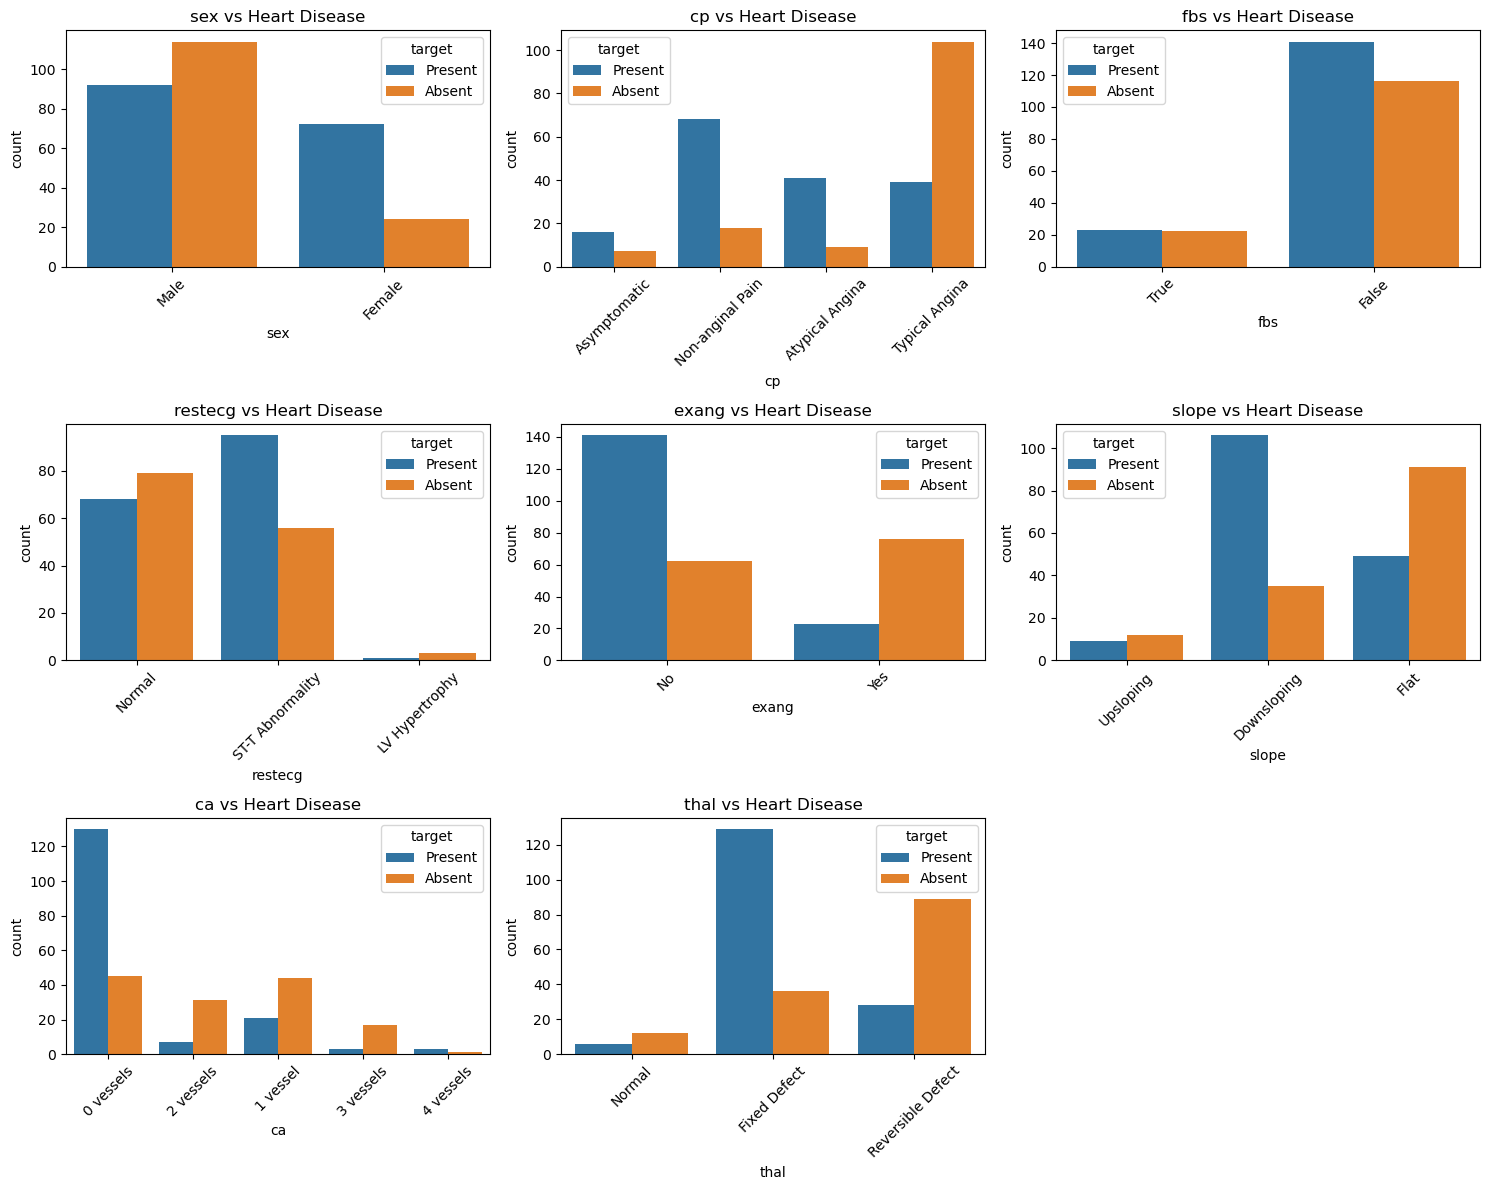

In [345]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df1, x=col, hue='target')
    plt.title(f'{col} vs Heart Disease')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:

-Sex: More males than females have CVD. Since males are more represented in the dataset, the percentage affected is also higher in men.

-Chest Pain (cp):“Asymptomatic” chest pain has the highest association with CVD.
                 “Typical Angina” is common among those without CVD.

-Fasting Blood Sugar (fbs):Most patients have normal fasting blood sugar, but high fbs doesn’t show a strong correlation with CVD in this dataset.

-Resting ECG (restecg):“ST-T abnormality” is more common in patients with CVD.

-Exercise-Induced Angina (exang):Most CVD patients do not have exercise-induced angina.

-Slope of ST segment:“Flat” and “downsloping” slopes are highly associated with CVD.

-Number of Vessels Colored (ca):More vessels detected (2 or more) increases the likelihood of CVD.

-Thalassemia (thal):“Fixed defect” has the strongest link to CVD.

# Occurrence of CVD Across Different Ages

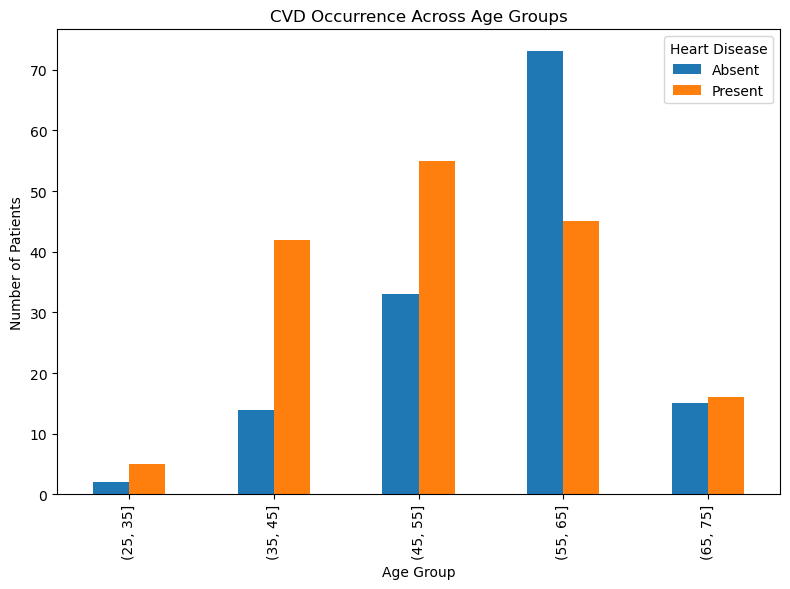

In [351]:
age_group_counts = df1.groupby(
    [pd.cut(df1['age'], bins=[25, 35, 45, 55, 65, 75]), 'target'],
    observed=False
).size().unstack()

age_group_counts.plot(kind='bar', figsize=(8, 6))
plt.title('CVD Occurrence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

Highest prevalence of CVD in middle-aged groups (35–55).

Interestingly, the 55–65 group has many people but fewer cases proportionally.

# Can We Detect Heart Attack Based on Anomalies in Resting Blood Pressure?

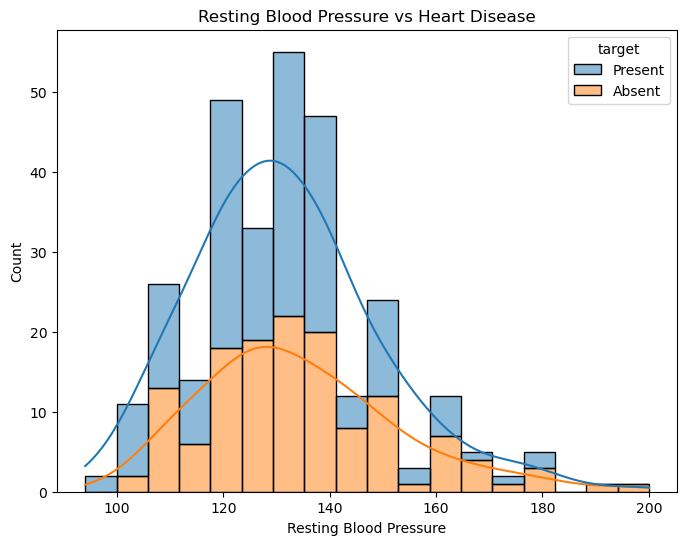

In [355]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='trestbps', hue='target', kde=True, multiple="stack")
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Count')
plt.show()

Observation:

Most CVD patients had resting BP between 120–140 mmHg.
Not a strong differentiation – CVD occurs in a broad BP range.

# Composition of Overall Patients w.r.t Gender

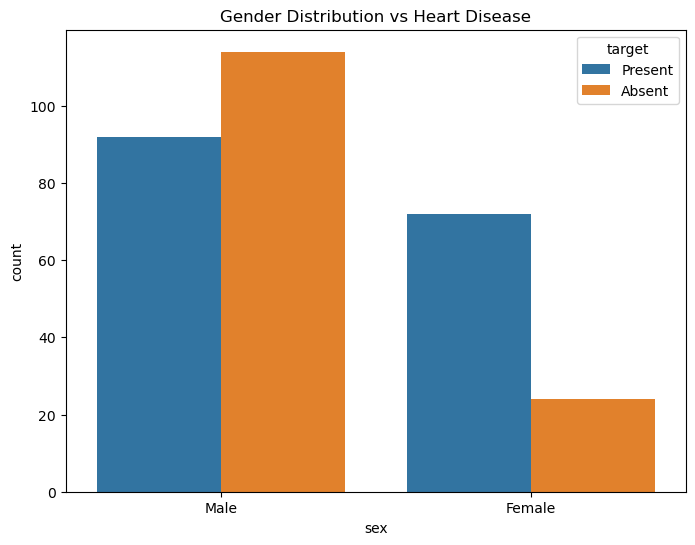

In [359]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='sex', hue='target')
plt.title('Gender Distribution vs Heart Disease')
plt.show()

Observations:

This plot shows that in our data set more male patients and less female patients,hence number of male patients having cvd is also higher but if we see the percentage,males have more prevalance of cvd

# Relationship Between Cholesterol Levels and Target Variable

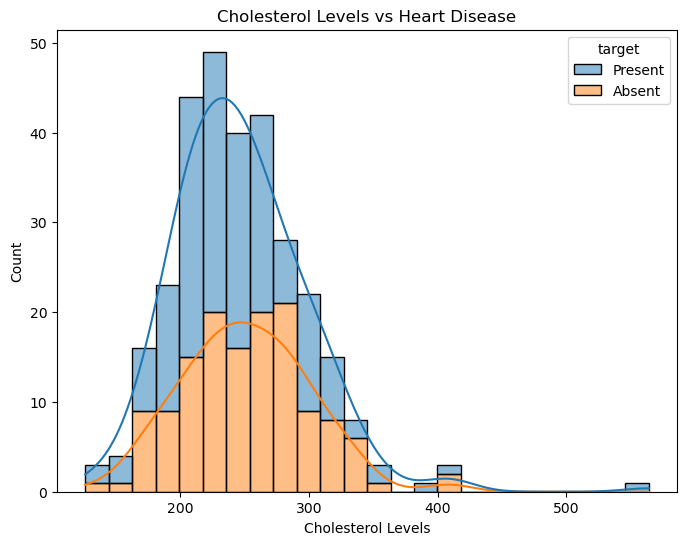

In [363]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='chol', hue='target', kde=True, multiple="stack")
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Count')
plt.show()

Observations:Most CVD cases are clustered around cholesterol levels 200–270 mg/dl.
Very high or low cholesterol levels are rare in the dataset.

 # Relationship Between Peak Exercise and Occurrence of Heart Attack

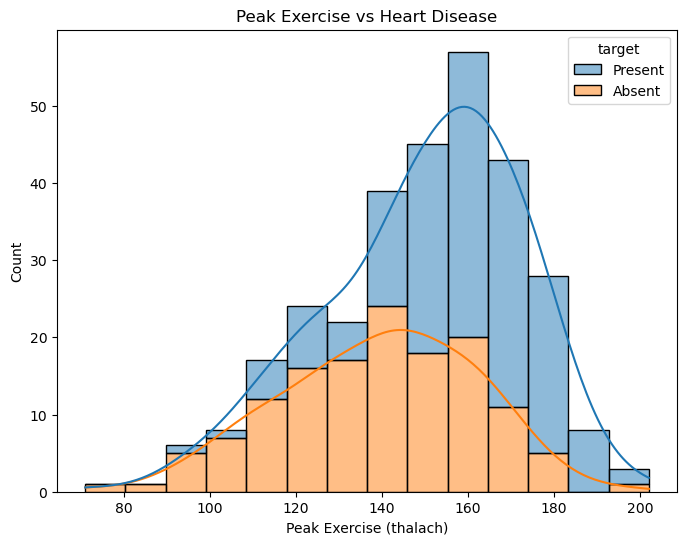

In [367]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='thalach', hue='target', kde=True, multiple="stack")
plt.title('Peak Exercise vs Heart Disease')
plt.xlabel('Peak Exercise (thalach)')
plt.ylabel('Count')
plt.show()

Patients with CVD tend to have higher peak heart rates than non-CVD patients.
This might indicate reduced heart efficiency or response during stress

# Is Thalassemia a Major Cause of CVD?

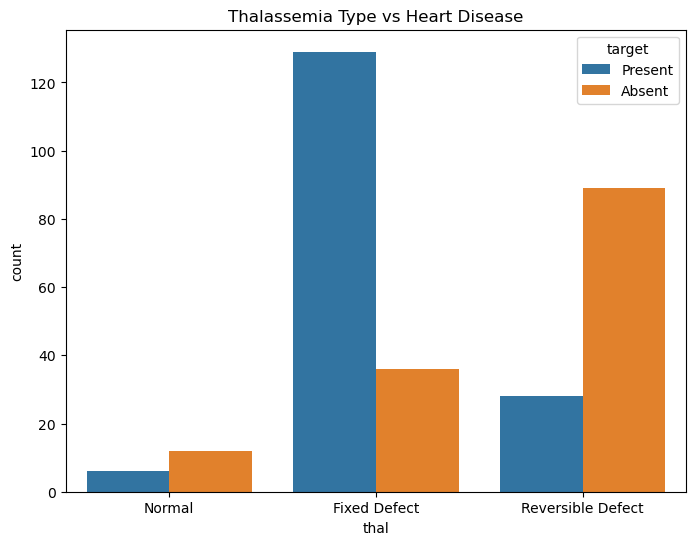

In [371]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='thal', hue='target')
plt.title('Thalassemia Type vs Heart Disease')
plt.show()

Fixed Defect thalassemia has a strong link to CVD in this dataset.
“Normal” thalassemia is least associated with CVD.


#  Pair Plot to Understand the Relationship Between Variables

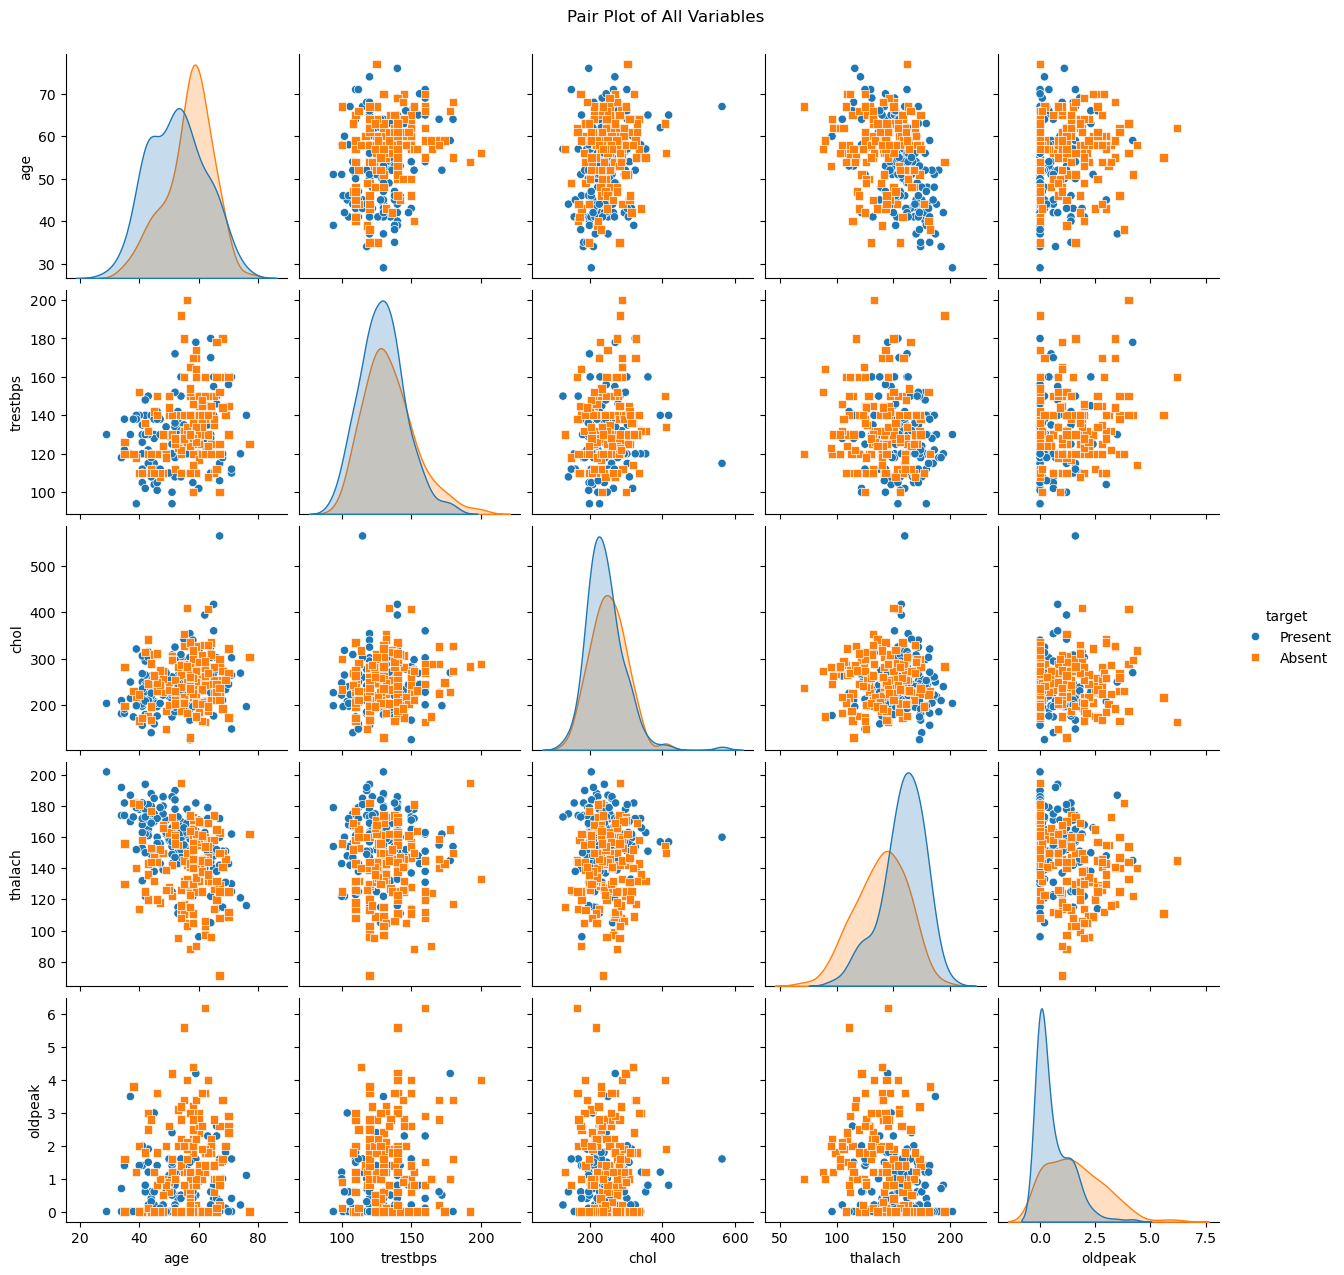

In [375]:
sns.pairplot(df1, hue='target', diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pair Plot of All Variables", y=1.02)
plt.show()

1. Age vs Other Variables
Age vs Cholesterol: No strong correlation. Cholesterol is scattered across ages for both classes.
Age vs Thalach (Max Heart Rate): A negative trend is visible – as age increases, maximum heart rate tends to decrease.
Age vs Oldpeak (ST depression): Older patients show a slightly wider range of oldpeak values, especially those with heart disease.

2.Thalach (Max Heart Rate):Patients with cardiovascular disease (CVD) in this dataset tend to have higher maximum heart rates (thalach) compared to those without CVD.

3. Oldpeak (ST Depression)
Higher oldpeak values (≥2.0) are more commonly associated with CVD.
This shows ST depression (a sign of heart stress) is a strong indicator.

4.Resting BP (trestbps)
Spread is fairly uniform. No strong separation between classes.
However, very high or very low trestbps values are less common overall.

5.CVD is common across a wide range of cholesterol levels, but values above 300 mg/dl tend to occur mostly in CVD cases.
Yet, there is no sharp boundary, indicating cholesterol alone may not be a strong predictor.